In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import collections

# Predicting Car Prices
<p> In this project, I will predict car prices using the k-nearest neighbours algorithm. I will use the data set from the <a href="https://archive.ics.uci.edu/ml/datasets/automobile">"UCI Machine Learning Repository"</a>. The data set contains information about various cars:</p>

In [2]:
cars = pd.read_csv('imports-85.data', header = None)
cars.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
cars.describe()

,0,9,10,11,12,13,16,20,23,24
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [4]:
cars.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
dtype: int64

The dataset has no column names. From the website, the following information can be obtained:

Attribute Information:

Attribute: Attribute Range

1. symboling: -3, -2, -1, 0, 1, 2, 3.
2. normalized-losses: continuous from 65 to 256.
3. make:
alfa-romero, audi, bmw, chevrolet, dodge, honda,
isuzu, jaguar, mazda, mercedes-benz, mercury,
mitsubishi, nissan, peugot, plymouth, porsche,
renault, saab, subaru, toyota, volkswagen, volvo

4. fuel-type: diesel, gas.
5. aspiration: std, turbo.
6. num-of-doors: four, two.
7. body-style: hardtop, wagon, sedan, hatchback, convertible.
8. drive-wheels: 4wd, fwd, rwd.
9. engine-location: front, rear.
10. wheel-base: continuous from 86.6 120.9.
11. length: continuous from 141.1 to 208.1.
12. width: continuous from 60.3 to 72.3.
13. height: continuous from 47.8 to 59.8.
14. curb-weight: continuous from 1488 to 4066.
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. num-of-cylinders: eight, five, four, six, three, twelve, two.
17. engine-size: continuous from 61 to 326.
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. bore: continuous from 2.54 to 3.94.
20. stroke: continuous from 2.07 to 4.17.
21. compression-ratio: continuous from 7 to 23.
22. horsepower: continuous from 48 to 288.
23. peak-rpm: continuous from 4150 to 6600.
24. city-mpg: continuous from 13 to 49.
25. highway-mpg: continuous from 16 to 54.
26. price: continuous from 5118 to 45400.

First, I will create a dictionary and rename the columns:

In [5]:
col_names = {
    0: 'symboling',
    1: 'normalized-losses',
    2: 'make',
    3: 'fuel-type',
    4: 'aspiration',
    5: 'num-of-doors',
    6: 'body-style',
    7: 'drive-wheels',
    8: 'engine-location',
    9: 'wheel-base',
    10: 'length',
    11: 'width',
    12: 'height',
    13: 'curb-weight',
    14: 'engine-type',
    15: 'num-of-cylinders',
    16: 'engine-size',
    17: 'fuel-system',
    18: 'bore',
    19: 'stroke',
    20: 'compression-ratio',
    21: 'horsepower',
    22: 'peak-rpm',
    23: 'city-mpg',
    24: 'highway-mpg',
    25: 'price'
}
cars = cars.rename(columns = col_names)
cars.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [6]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-ratio    205 non-null float64
horsepower           205 non-nul

Now I have to determine which columns I can use for the k-nearest neighbour algorithm. For this algorithm, only numeric columns will work. However, if there are `NaN` for example, a numeric column would be read in as an `object` column. Therefore, I will need to investigate which columns are suitable:

In [7]:
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [8]:
not_numeric = ['make',
               'fuel-type',
               'aspiration',
               'body-style',
               'engine-location',
               'engine-type',
              'fuel-system',
               'drive-wheels'
              ]
cars.drop(columns = not_numeric, inplace = True)
cars.head()

,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,two,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,two,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,two,94.5,171.2,65.5,52.4,2823,six,152,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,four,99.8,176.6,66.2,54.3,2337,four,109,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,four,99.4,176.6,66.4,54.3,2824,five,136,3.19,3.40,8.0,115,5500,18,22,17450


The next step is to clean the data. The column "normalized losses" has "?" instead of `NaN`. Another example is the column "num-of-doors", which has the numbers written out.

In [9]:
cars['normalized-losses'].value_counts(normalize = True).head()

?      0.200000
161    0.053659
91     0.039024
150    0.034146
104    0.029268
Name: normalized-losses, dtype: float64

In [10]:
cars['normalized-losses'] = cars['normalized-losses'].replace('?',np.nan).astype(float)

In [11]:
number_dict = {
    'one':1,
    'two':2,
    'three':3,
    'four':4,
    'five':5,
    'six':6,
    'seven':7,
    'eight':8,
    'nine':9,
    'ten':10,
    'eleven':11,
    'twelve':12
}

In [12]:
cars['num-of-doors'].value_counts()

four    114
two      89
?         2
Name: num-of-doors, dtype: int64

In [13]:
cars = cars.replace('?',np.nan)
cars['num-of-doors'] = cars['num-of-doors'].replace(number_dict)
cars.head()

,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,2.0,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,2.0,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,2.0,94.5,171.2,65.5,52.4,2823,six,152,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,4.0,99.8,176.6,66.2,54.3,2337,four,109,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164.0,4.0,99.4,176.6,66.4,54.3,2824,five,136,3.19,3.40,8.0,115,5500,18,22,17450


In [14]:
cars['num-of-cylinders'].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: num-of-cylinders, dtype: int64

In [15]:
cars['num-of-cylinders'] = cars['num-of-cylinders'].replace(number_dict)
cars.head()

,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,2.0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,2.0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,2.0,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,4.0,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164.0,4.0,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450


In [16]:
cars = cars.astype(float)

In [17]:
cars.describe()

,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164.000000,203.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,3.123153,98.756585,174.049268,65.907805,53.724878,2555.565854,4.380488,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,0.994841,6.021776,12.337289,2.145204,2.443522,520.680204,1.080854,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,2.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,2.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,4.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,4.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,4.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,4.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,4.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,4.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,12.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


Now that I have replaced the question marks with `NaN`, it becomes clear how many missing values this data set has. The next question is how to handle missing values? Which rows or even which columns should be discarded? Or should the missing values be replaced with the mean of the column?

In [18]:
cars.isnull().sum()

symboling             0
normalized-losses    41
num-of-doors          2
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
num-of-cylinders      0
engine-size           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [19]:
cars.shape

(205, 18)

`Normalized losses` is the only column with an significantly large amount of `NaN`s. I will investigate where the missing values are: 

In [20]:
col_nan = cars.isnull().sum()[cars.isnull().sum() != 0].index

In [21]:
nans = cars[col_nan][cars[col_nan].isna().any(axis=1)]
nans

,normalized-losses,num-of-doors,bore,stroke,horsepower,peak-rpm,price
0,NaN,2.0,3.47,2.68,111.0,5000.0,13495.0
1,NaN,2.0,3.47,2.68,111.0,5000.0,16500.0
2,NaN,2.0,2.68,3.47,154.0,5000.0,16500.0
5,NaN,2.0,3.19,3.40,110.0,5500.0,15250.0
7,NaN,4.0,3.19,3.40,110.0,5500.0,18920.0
9,NaN,2.0,3.13,3.40,160.0,5500.0,NaN
14,NaN,4.0,3.31,3.19,121.0,4250.0,24565.0
15,NaN,4.0,3.62,3.39,182.0,5400.0,30760.0
16,NaN,2.0,3.62,3.39,182.0,5400.0,41315.0
17,NaN,4.0,3.62,3.39,182.0,5400.0,36880.0


The rows with the missing price will need to be deleted as they obviously can't be used for any price prediction. For the other columns, I will substitue the missing value with the mean of the column:

In [22]:
cars = cars.dropna(subset = ['price'])
cars = cars.fillna(cars.mean())

In [23]:
cars[col_nan].iloc[nans.index]

,normalized-losses,num-of-doors,bore,stroke,horsepower,peak-rpm,price
0,122.0,2.0,3.470000,2.680000,111.000000,5000.00000,13495.0
1,122.0,2.0,3.470000,2.680000,111.000000,5000.00000,16500.0
2,122.0,2.0,2.680000,3.470000,154.000000,5000.00000,16500.0
5,122.0,2.0,3.190000,3.400000,110.000000,5500.00000,15250.0
7,122.0,4.0,3.190000,3.400000,110.000000,5500.00000,18920.0
10,192.0,2.0,3.500000,2.800000,101.000000,5800.00000,16430.0
15,122.0,4.0,3.620000,3.390000,182.000000,5400.00000,30760.0
16,122.0,2.0,3.620000,3.390000,182.000000,5400.00000,41315.0
17,122.0,4.0,3.620000,3.390000,182.000000,5400.00000,36880.0
18,121.0,2.0,2.910000,3.030000,48.000000,5100.00000,5151.0


In [24]:
cars.isnull().sum()

symboling            0
normalized-losses    0
num-of-doors         0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
num-of-cylinders     0
engine-size          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

Now that all missing values have been dealt with, I can normalise the columns:

In [25]:
cars_price = cars['price']
cars = (cars - cars.min())/(cars.max() - cars.min())
cars['price'] = cars_price

In [26]:
cars.head()

,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1.0,0.298429,0.0,0.058309,0.413433,0.324786,0.083333,0.411171,0.2,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,1.0,0.298429,0.0,0.058309,0.413433,0.324786,0.083333,0.411171,0.2,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.6,0.298429,0.0,0.230321,0.449254,0.444444,0.383333,0.517843,0.4,0.343396,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.8,0.518325,1.0,0.384840,0.529851,0.504274,0.541667,0.329325,0.2,0.181132,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.8,0.518325,1.0,0.373178,0.529851,0.521368,0.541667,0.518231,0.3,0.283019,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


## Univariate Model
<p> First, I will try to predict prices using only one columns. In the latter section, I will use multiple columns.</p>
<p>The function `knn_train_test` takes in four variables: the dataframe, the number of nearest neighbours, the training columns, and the target column. The function splits the dataframe into a training and a test set (75% training and 25% test set) and performs the k-nearest neighbours algorithm. Finally, it yields the Root Mean Square Error:</p>

In [27]:
def knn_train_test(df,k_n,train_cols,target_col):
    index = round(df.shape[0]*0.75)
    
    shuffled_index = np.random.permutation(df.index)
    random_df = df.reindex(shuffled_index)
    
    train_df = random_df.iloc[:index].copy()
    test_df = random_df.iloc[index:].copy()
    
    knn = KNeighborsRegressor(n_neighbors = k_n, algorithm = 'brute')
    knn.fit(train_df[train_cols],train_df[target_col])
    predictions = knn.predict(test_df[train_cols])
    
    rmse = np.sqrt(mean_squared_error(predictions, test_df[target_col]))
    return rmse

In [28]:
knn_train_test(cars,5,['horsepower'],'price')

3119.4526818658433

I want to test which column yields the lowest Root Mean Square Error:

In [29]:
training_cols = cars.columns.drop('price')
rmses = {}
for col in training_cols:
    rmse = knn_train_test(cars,5,[col],'price')
    rmses[col] = rmse
rmses_series = pd.Series(rmses)
rmses_series = rmses_series.sort_values()
rmses_series

engine-size          3131.179227
horsepower           4383.930733
width                4526.862219
highway-mpg          4679.545625
city-mpg             4903.714200
curb-weight          5085.602508
compression-ratio    5224.008580
num-of-cylinders     5363.896987
length               5448.280129
wheel-base           6957.076526
bore                 6960.139201
num-of-doors         7306.931156
normalized-losses    7394.059247
stroke               7575.722915
symboling            8296.133686
height               9259.180431
peak-rpm             9702.904071
dtype: float64

Testing different k values:

In [30]:
def knn_train_test_k(df,train_cols,target_col):
    index = round(df.shape[0]*0.75)
    
    shuffled_index = np.random.permutation(df.index)
    random_df = df.reindex(shuffled_index)
    
    train_df = random_df.iloc[:index].copy()
    test_df = random_df.iloc[index:].copy()
    
    k_values = [1,3,5,7,9]
    rmses_ = {}
    for k in k_values:        
    
        knn = KNeighborsRegressor(n_neighbors = k, algorithm = 'brute')
        knn.fit(train_df[train_cols],train_df[target_col])
        predictions = knn.predict(test_df[train_cols])
    
        rmse = np.sqrt(mean_squared_error(predictions, test_df[target_col]))
        rmses_[k] = rmse
    return rmses_

In [31]:
knn_train_test_k(cars,['horsepower'],'price')

{1: 4724.529481334623,
 3: 4653.083607673518,
 5: 4478.874142371049,
 7: 4523.840561256937,
 9: 4306.805835814683}

In [32]:
training_cols = cars.columns.drop('price')
rmses = {}
for col in training_cols:
    rmse = knn_train_test_k(cars,[col],'price')
    rmses[col] = rmse

rmses

{'bore': {1: 8203.019331928945,
  3: 7481.669814805902,
  5: 8987.3030727577,
  7: 8299.509280502243,
  9: 8027.690386314019},
 'city-mpg': {1: 4753.136316160099,
  3: 4676.628286371377,
  5: 5450.490532273218,
  7: 5622.146050201463,
  9: 6027.845706263434},
 'compression-ratio': {1: 7825.068515993966,
  3: 6553.73235662109,
  5: 6375.8655886083425,
  7: 6962.246621718642,
  9: 7440.428879282049},
 'curb-weight': {1: 3745.955624403471,
  3: 3838.2409666118906,
  5: 3891.944427866359,
  7: 4175.2065307342245,
  9: 4087.0874425091583},
 'engine-size': {1: 3027.8761038060984,
  3: 2782.1625393847057,
  5: 2749.1818628821193,
  7: 3251.8994362165176,
  9: 3579.6949098567493},
 'height': {1: 7848.27660572689,
  3: 8339.929343558946,
  5: 8545.759619975277,
  7: 8820.677378310857,
  9: 8302.667525872945},
 'highway-mpg': {1: 5767.546339649123,
  3: 5570.227992940086,
  5: 5166.628958847345,
  7: 5105.556645340008,
  9: 5163.589080819227},
 'horsepower': {1: 2237.8661532808437,
  3: 3147.788

In [33]:
rmses['width'].keys()

dict_keys([1, 3, 9, 5, 7])

In [34]:
rmses['width'].values()

dict_values([2408.2710686299415, 2889.678259291546, 2991.7409310497655, 3457.3663375465435, 3354.4769894964584])

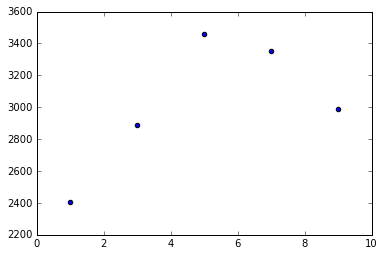

In [35]:
plt.scatter(*zip(*rmses['width'].items()))

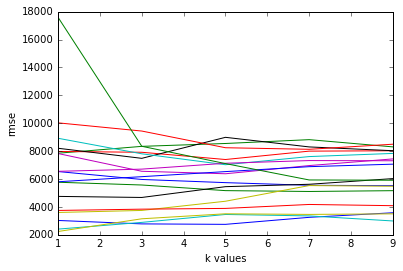

In [36]:
for k, val in rmses.items():
    val = sorted(val.items())
    ordered_val = collections.OrderedDict(val)
    x = list(ordered_val.keys())
    y = list(ordered_val.values())
    plt.plot(x,y)
    plt.xlabel('k values')
    plt.ylabel('rmse')

It seems that k=5 is a good compromise. However, the plot doesn't show a clear favourite.

## Multivariate Model
<p>I will modify the function `knn_train_test` to accept a list of columns:</p>

In [37]:
def knn_train_test_multi(df,k_n,train_cols_list,target_col):
    index = round(df.shape[0]*0.75)
    
    shuffled_index = np.random.permutation(df.index)
    random_df = df.reindex(shuffled_index)
    
    train_df = random_df.iloc[:index].copy()
    test_df = random_df.iloc[index:].copy()
    
    knn = KNeighborsRegressor(n_neighbors = k_n, algorithm = 'brute')
    knn.fit(train_df[train_cols_list],train_df[target_col])
    predictions = knn.predict(test_df[train_cols_list])
    
    rmse = np.sqrt(mean_squared_error(predictions, test_df[target_col]))
    return rmse

In [38]:
train_col_test = list(cars.columns[:3])
train_col_test

['symboling', 'normalized-losses', 'num-of-doors']

In [39]:
knn_train_test_multi(cars,5,train_col_test,'price')

6793.552339917608

I will now combine columns that have performed well in the previous step. Here is the list of rmses with k=5 of the univariate models:

In [40]:
rmses_series

engine-size          3131.179227
horsepower           4383.930733
width                4526.862219
highway-mpg          4679.545625
city-mpg             4903.714200
curb-weight          5085.602508
compression-ratio    5224.008580
num-of-cylinders     5363.896987
length               5448.280129
wheel-base           6957.076526
bore                 6960.139201
num-of-doors         7306.931156
normalized-losses    7394.059247
stroke               7575.722915
symboling            8296.133686
height               9259.180431
peak-rpm             9702.904071
dtype: float64

In [41]:
rmses = {}
for x in [2,3,4,5,6,7,8]:
    trainings_col = rmses_series.index[:x]
    rmse = knn_train_test_multi(cars,5,trainings_col,'price')
    rmses[x] = rmse
rmses

{2: 2892.3025966174428,
 3: 2203.922915893385,
 4: 1891.7601991795896,
 5: 3795.1560864870894,
 6: 3464.333437762595,
 7: 2443.2402629295384,
 8: 1710.3543887744436}

The model performs best with the 6 best performing columns from the univariate models as training columns.

## Hyperparameter Tuning
<p>What is the best k and the best number of columns for the training set?</p>

In [42]:
def knn_train_test_k_multi(df,train_cols,target_col):
    index = round(df.shape[0]*0.75)
    
    shuffled_index = np.random.permutation(df.index)
    random_df = df.reindex(shuffled_index)
    
    train_df = random_df.iloc[:index].copy()
    test_df = random_df.iloc[index:].copy()
    
    k_values = [x for x in range(1,25)]
    rmses_ = {}
    for k in k_values:        
    
        knn = KNeighborsRegressor(n_neighbors = k, algorithm = 'brute')
        knn.fit(train_df[train_cols],train_df[target_col])
        predictions = knn.predict(test_df[train_cols])
    
        rmse = np.sqrt(mean_squared_error(predictions, test_df[target_col]))
        rmses_[k] = rmse
    return rmses_

In [43]:
k_rmses = {}
for x in [2,3,4,5,6]:
    trainings_col = rmses_series.index[:x]
    rmse = knn_train_test_k_multi(cars,trainings_col,'price')
    k_rmses[x] = rmse
k_rmses

{2: {1: 3467.5721910293373,
  2: 2850.8240983968126,
  3: 3068.9369523953696,
  4: 3612.1861777184185,
  5: 3384.4176215118605,
  6: 3195.4506762653123,
  7: 3156.1316696751624,
  8: 3346.992513109717,
  9: 3419.5435804024496,
  10: 3587.741737834539,
  11: 3752.820668389433,
  12: 3856.380447568535,
  13: 3915.672458272445,
  14: 3766.908083994791,
  15: 3708.0145065999345,
  16: 3639.0781957476024,
  17: 3686.269221450107,
  18: 3731.8772008001347,
  19: 3730.0949824820746,
  20: 3779.1921689760634,
  21: 3808.982971340739,
  22: 3844.656825366174,
  23: 3852.7090248070735,
  24: 3892.801228737262},
 3: {1: 2960.857767607218,
  2: 3258.236133247558,
  3: 3470.199830941536,
  4: 3587.461619655324,
  5: 3892.0352577025815,
  6: 4091.9671582124033,
  7: 4229.969206140626,
  8: 4377.671334775202,
  9: 4430.738428159062,
  10: 4486.398297365047,
  11: 4353.704895396374,
  12: 4167.755535373793,
  13: 4266.147453849687,
  14: 4178.022531970485,
  15: 4246.806613863593,
  16: 4228.026457970

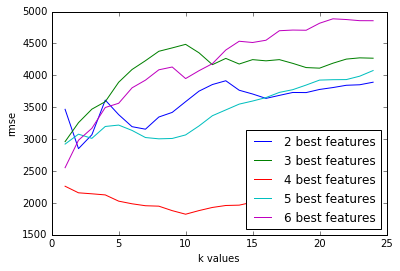

In [44]:
for k, val in k_rmses.items():
    val = sorted(val.items())
    ordered_val = collections.OrderedDict(val)
    x = list(ordered_val.keys())
    y = list(ordered_val.values())
    plt.plot(x,y,label = '{} best features'.format(k))
plt.xlabel('k values')
plt.ylabel('rmse')
plt.legend(loc = 4)


From all number of features, two features perform the worse. 5 features and k = 2 yields the lowest root mean square error.